<IPython.core.display.Javascript object>


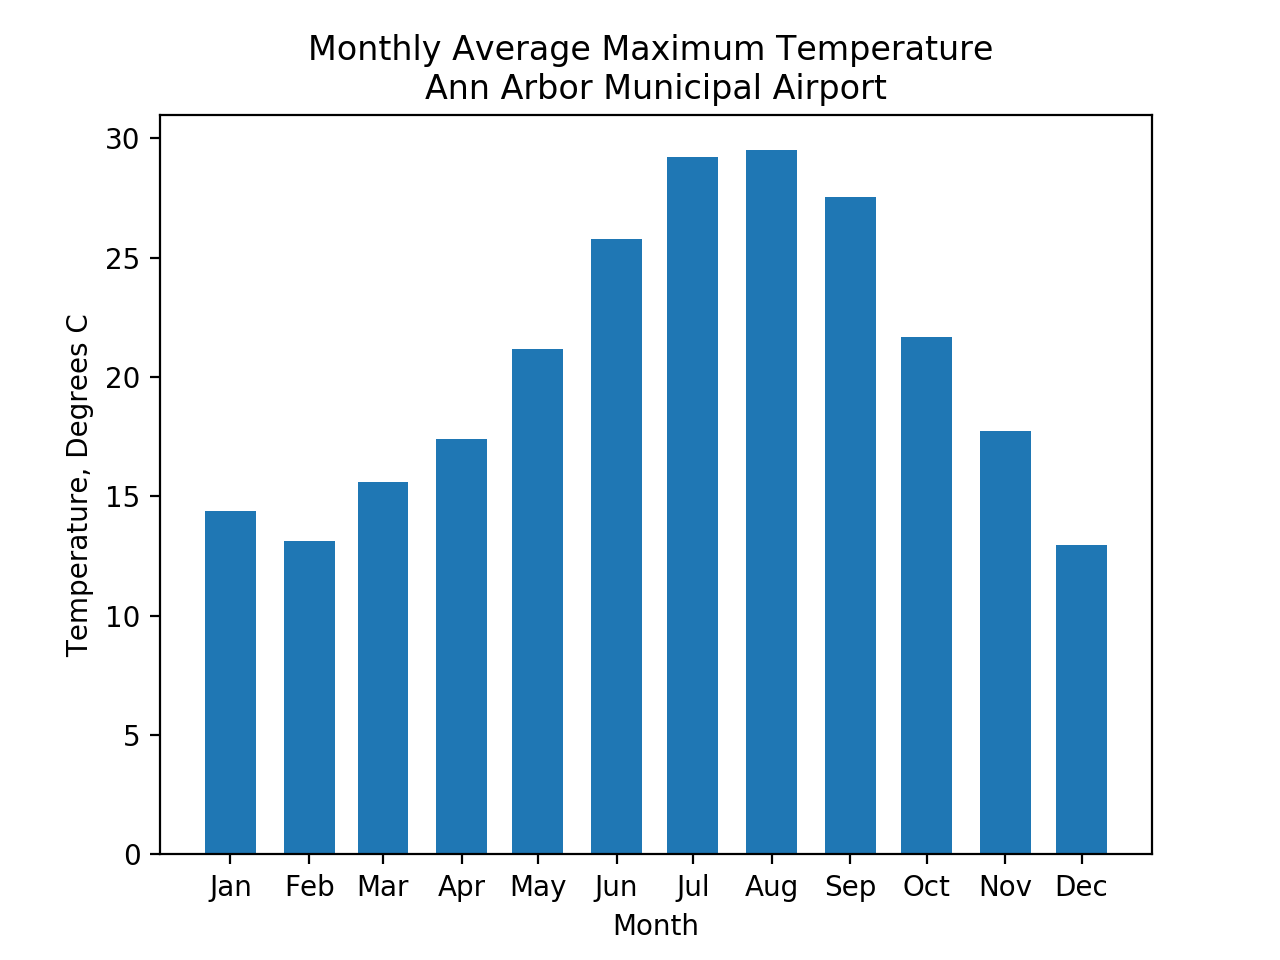

In [5]:
%matplotlib notebook
import pandas as pd
import numpy as np
#import matplotlib as mpl
#from matplotlib.artist import Artist
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = pd.read_csv('../../21f22d18c15db96f2a6ce96fdf640ced045b79a0fcb2ceacf61668e3.csv')
df = df[df['ID']=='USC00046006']
df = df[df['Element']=='TMAX']
df['MONTH'] = pd.DatetimeIndex(df['Date']).strftime('%m')
df.sort_values(by=['Date'])

df = df.groupby(['MONTH']).mean()/10
df['MONTH'] = "1-" + df.index + "-00"
df['MONTH'] = pd.to_datetime(df['MONTH'] , format='%d-%m-%y')
df.set_index(df['MONTH'], inplace=True)

#import calendar
#df['MONTH'] = df['MONTH'].apply(lambda x: calendar.month_abbr[x])
#df.set_index('MONTH')

fmt = mdates.DateFormatter('%b')
months = mdates.MonthLocator()

fig, ax = plt.subplots()

plt.xlabel("Month")
plt.ylabel("Temperature, Degrees C")
plt.title("Monthly Average Maximum Temperature \nAnn Arbor Municipal Airport")

ax.bar(df.index.values,df['Data_Value'], width=20)
ax.xaxis.set_major_formatter(fmt)
ax.xaxis.set_major_locator(months)
plt.show()

# df.index.values, df['Data_Value']